# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [22]:
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt  # Mengimpor pustaka matplotlib untuk visualisasi grafik
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
 
from sklearn.cluster import KMeans, DBSCAN  # Mengimpor algoritma KMeans dan DBSCAN untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [23]:
# Membaca dataset pelanggan mall dari URL dan menampilkan 5 baris pertama
df = pd.read_csv("./data-clustering/data.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [24]:
# Menampilkan informasi tentang dataset, termasuk jumlah baris, kolom, tipe data, dan jumlah nilai non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2499 entries, 0 to 2498
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    2499 non-null   object 
 1   StockCode    2499 non-null   object 
 2   Description  2489 non-null   object 
 3   Quantity     2499 non-null   int64  
 4   InvoiceDate  2499 non-null   object 
 5   UnitPrice    2499 non-null   float64
 6   CustomerID   1919 non-null   float64
 7   Country      2499 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 156.3+ KB


In [25]:
df.isna().sum()

InvoiceNo        0
StockCode        0
Description     10
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     580
Country          0
dtype: int64

In [26]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,2499.000000,2499.000000,1919.000000
mean,10.068427,3.699476,15637.112559
std,29.144702,12.331125,1848.418705
min,-24.000000,0.000000,12431.000000
25%,1.000000,1.250000,14307.000000
50%,3.000000,2.510000,15605.000000
75%,10.000000,4.210000,17841.000000
max,600.000000,569.770000,18229.000000


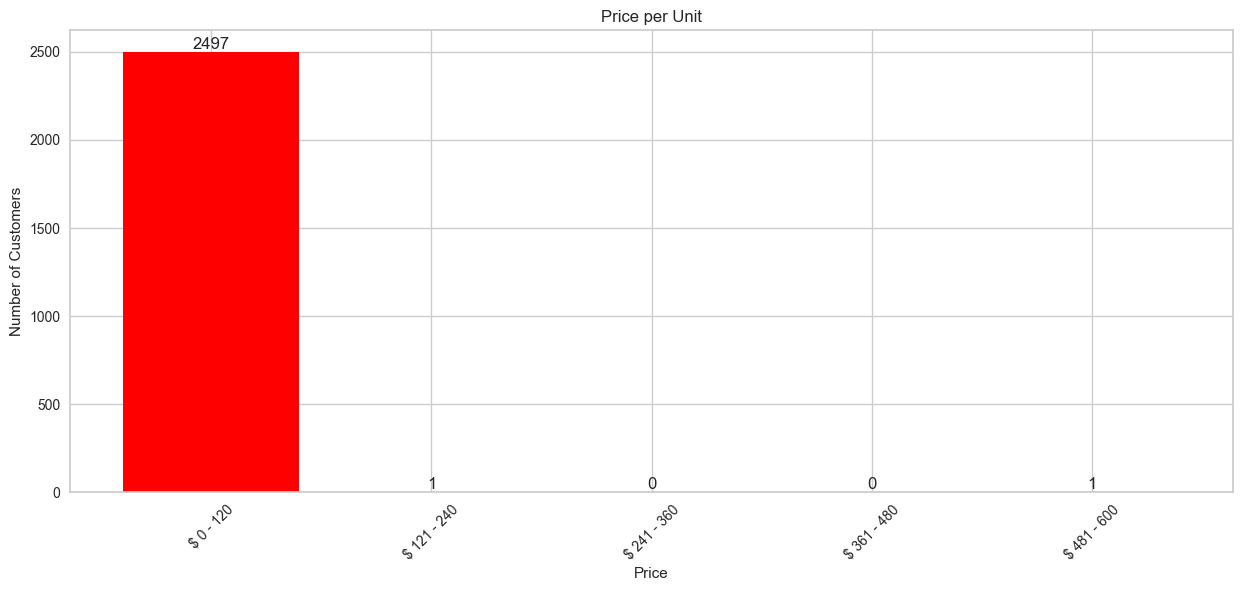

In [27]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["UnitPrice"][(df["UnitPrice"] >= 0.0) & (df["UnitPrice"] <= 120.0)]
ai31_60 = df["UnitPrice"][(df["UnitPrice"] >= 121.0) & (df["UnitPrice"] <= 240.0)]
ai61_90 = df["UnitPrice"][(df["UnitPrice"] >= 241.0) & (df["UnitPrice"] <= 360.0)]
ai91_120 = df["UnitPrice"][(df["UnitPrice"] >= 361.0) & (df["UnitPrice"] <= 480.0)]
ai121_150 = df["UnitPrice"][(df["UnitPrice"] >= 481.0) & (df["UnitPrice"] <= 600.0)]
 
# Menyusun data untuk plotting
# aix = ["$ 0 - 50", "$ 50 - 100", "$ 100 - 200 ", "$ 200 - 300", "$ 300 - 600"]
aix = ["$ 0 - 120", "$ 121 - 240", "$ 241 - 360", "$ 361 - 480", "$ 481 - 600"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Price per Unit")
plt.xlabel("Price")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

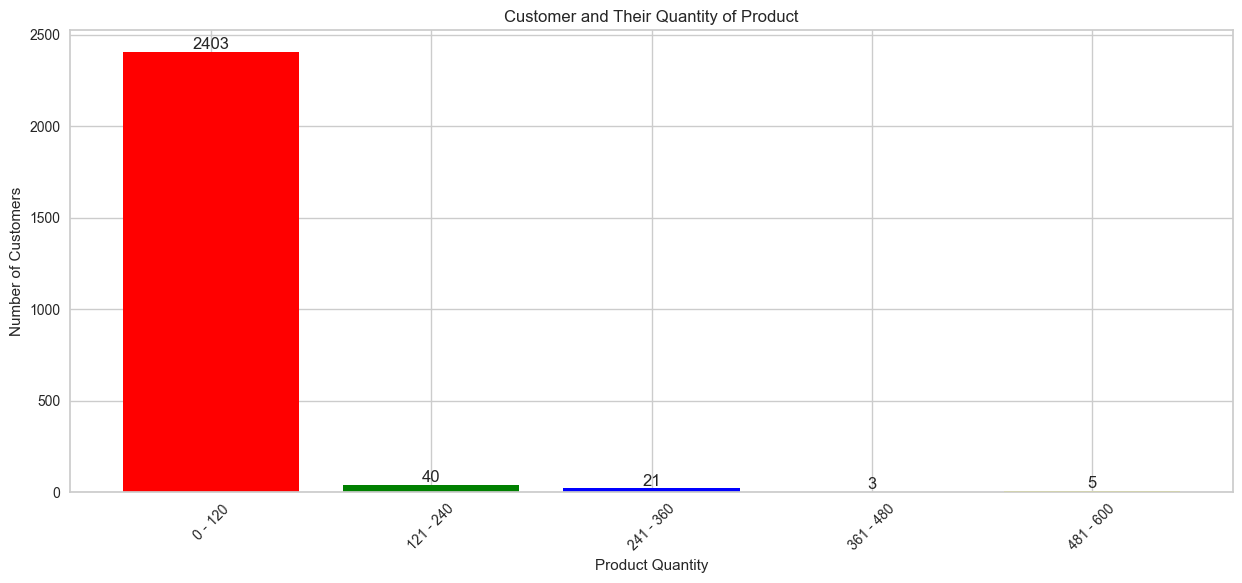

In [28]:
# Mengelompokkan pendapatan tahunan pelanggan ke dalam kategori dan menghitung jumlah pelanggan di setiap kategori
ai0_30 = df["Quantity"][(df["Quantity"] >= 0) & (df["Quantity"] <= 50)]
ai31_60 = df["Quantity"][(df["Quantity"] >= 51) & (df["Quantity"] <= 100)]
ai61_90 = df["Quantity"][(df["Quantity"] >= 101) & (df["Quantity"] <= 200)]
ai91_120 = df["Quantity"][(df["Quantity"] >= 201) & (df["Quantity"] <= 300)]
ai121_150 = df["Quantity"][(df["Quantity"] >= 301) & (df["Quantity"] <= 600)]
 
# Menyusun data untuk plotting
aix = ["0 - 120", "121 - 240", "241 - 360", "361 - 480", "481 - 600"]
aiy = [len(ai0_30.values), len(ai31_60.values), len(ai61_90.values), len(ai91_120.values), len(ai121_150.values)]
 
# Membuat bar chart untuk distribusi pendapatan tahunan pelanggan
plt.figure(figsize=(15, 6))
plt.bar(aix, aiy, color=['red', 'green', 'blue', 'cyan', 'yellow'])
plt.title("Customer and Their Quantity of Product")
plt.xlabel("Product Quantity")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)  # Memutar label sumbu x agar lebih mudah dibaca
 
# Menambahkan label jumlah pelanggan di atas setiap bar
for i in range(len(aix)):
  plt.text(i, aiy[i], aiy[i], ha='center', va='bottom')
 
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [29]:
df.Description.value_counts()

Description
HAND WARMER SCOTTY DOG DESIGN         18
WHITE HANGING HEART T-LIGHT HOLDER    15
HAND WARMER RED RETROSPOT             14
HAND WARMER OWL DESIGN                14
JAM MAKING SET PRINTED                13
                                      ..
KIDS RAIN MAC PINK                     1
LETTER "S" BLING KEY RING              1
LETTER "V" BLING KEY RING              1
LETTER "M" BLING KEY RING              1
BOX OF VINTAGE JIGSAW BLOCKS           1
Name: count, Length: 1166, dtype: int64

In [30]:
df['Description'].fillna(value="HAND WARMER SCOTTY DOG DESIGN", inplace=True)
df.isna().sum()

C:\Users\risma\AppData\Local\Temp\ipykernel_34972\2064402020.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Description'].fillna(value="HAND WARMER SCOTTY DOG DESIGN", inplace=True)


InvoiceNo        0
StockCode        0
Description      0
Quantity         0
InvoiceDate      0
UnitPrice        0
CustomerID     580
Country          0
dtype: int64

In [31]:
df.CustomerID.value_counts()

CustomerID
17968.0    85
17850.0    84
17920.0    81
12433.0    73
14729.0    71
           ..
17809.0     1
15100.0     1
13748.0     1
12748.0     1
17460.0     1
Name: count, Length: 94, dtype: int64

In [32]:
df['CustomerID'].fillna(value=17968.0, inplace=True)
df.isna().sum()

C:\Users\risma\AppData\Local\Temp\ipykernel_34972\899959543.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CustomerID'].fillna(value=17968.0, inplace=True)


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [33]:
df['Quantity'] = df['Quantity'].apply(lambda x: x if x >= 0 else 0)
df.describe()

,Quantity,UnitPrice,CustomerID
count,2499.000000,2499.000000,2499.000000
mean,10.145658,3.699476,16178.094838
std,29.096943,12.331125,1895.270029
min,0.000000,0.000000,12431.000000
25%,1.000000,1.250000,14696.000000
50%,3.000000,2.510000,16539.000000
75%,10.000000,4.210000,17968.000000
max,600.000000,569.770000,18229.000000


In [34]:
df.isna().sum()
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  44


In [35]:
df.drop_duplicates(inplace=True)
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [36]:
X = df.iloc[:, [3, 5]].values
print(pd.DataFrame(X, columns=['Quantity', 'UnitPrice']))

      Quantity  UnitPrice
0          6.0       2.55
1          6.0       3.39
2          8.0       2.75
3          6.0       3.39
4          6.0       3.39
...        ...        ...
2450       1.0       4.21
2451       1.0       7.62
2452       1.0      11.02
2453       1.0       2.51
2454       1.0       5.91

[2455 rows x 2 columns]


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [37]:
from sklearn.cluster import KMeans
 
# Inisialisasi dan melatih model KMeans dengan jumlah cluster = 4
kmeans = KMeans(n_clusters= 4, random_state=0)
kmeans.fit(X)

# Mendapatkan label cluster
labels = kmeans.labels_
 
# Mendapatkan jumlah cluster
k = 4
 
# Fungsi untuk analisis karakteristik cluster
def analyze_clusters(X, labels, k):
    print("Analisis Karakteristik Setiap Cluster:")
    for cluster_id in range(k):
        # Mengambil data untuk cluster saat ini
        cluster_data = X[labels == cluster_id]
 
        # Menghitung rata-rata untuk setiap fitur dalam cluster
        mean_income = cluster_data[:, 0].mean()  # Rata-rata Annual Income
        mean_spending = cluster_data[:, 1].mean()  # Rata-rata Spending Score
 
        print(f"\nCluster {cluster_id + 1}:")
        print(f"Rata-rata Quantity: {mean_income:.2f}")
        print(f"Rata-rata Unit Price: {mean_spending:.2f}")
 
# Analisis karakteristik setiap cluster
analyze_clusters(X, labels, k)

Analisis Karakteristik Setiap Cluster:

Cluster 1:
Rata-rata Quantity: 4.03
Rata-rata Unit Price: 4.02

Cluster 2:
Rata-rata Quantity: 134.76
Rata-rata Unit Price: 1.54

Cluster 3:
Rata-rata Quantity: 465.60
Rata-rata Unit Price: 1.86

Cluster 4:
Rata-rata Quantity: 33.42
Rata-rata Unit Price: 1.52


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

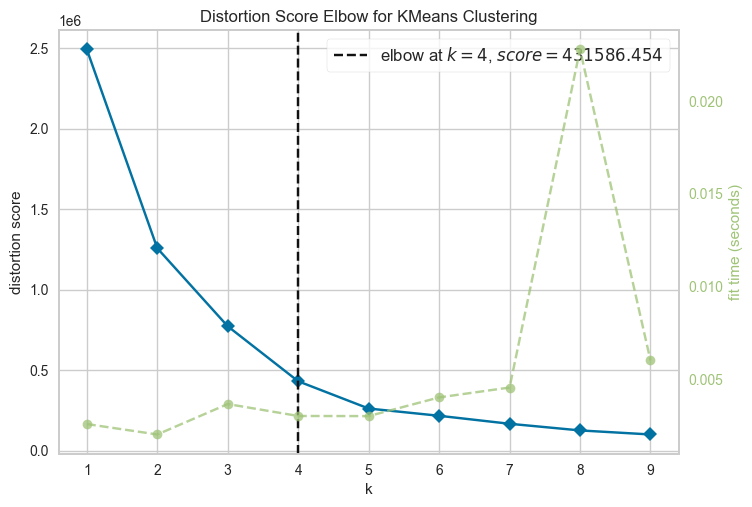

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [38]:
kmeans = KMeans()
visualizer = KElbowVisualizer(kmeans, k=(1, 10))
visualizer.fit(X)
visualizer.show()

## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [39]:
#Type your code here

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

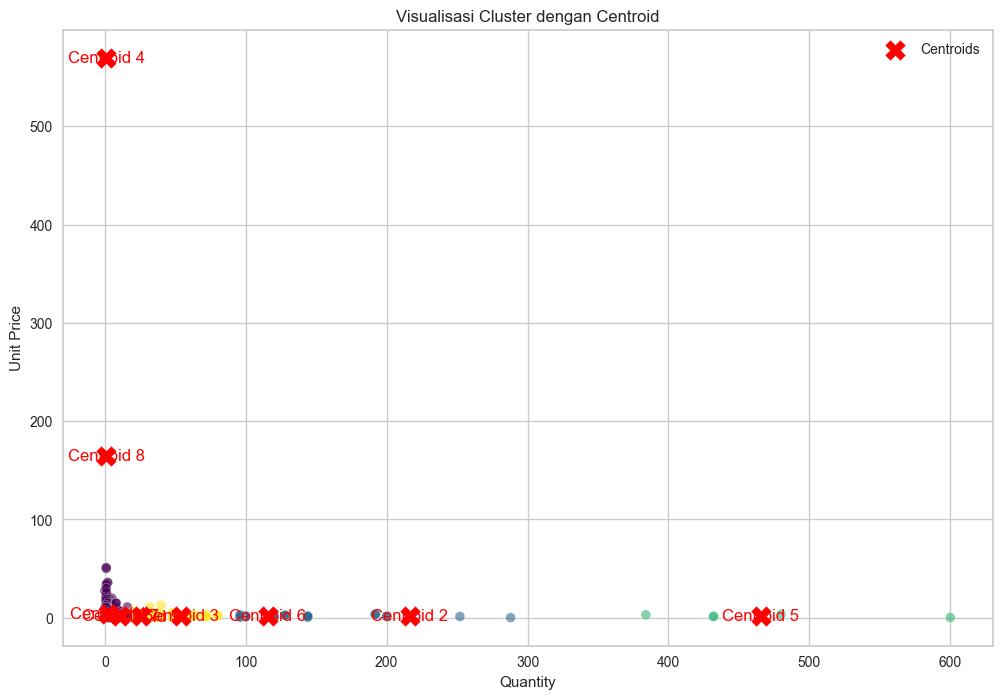

Nilai Centroids:
Centroid 1: Quantity = 2.33, Unit Price = 4.10
Centroid 2: Quantity = 216.50, Unit Price = 1.96
Centroid 3: Quantity = 53.83, Unit Price = 1.77
Centroid 4: Quantity = 1.00, Unit Price = 569.77
Centroid 5: Quantity = 465.60, Unit Price = 1.86
Centroid 6: Quantity = 115.53, Unit Price = 1.44
Centroid 7: Quantity = 11.09, Unit Price = 1.98
Centroid 8: Quantity = 1.00, Unit Price = 165.00
Centroid 9: Quantity = 25.93, Unit Price = 1.44


In [40]:
import matplotlib.pyplot as plt
 
# Menentukan posisi centroid
centroids = kmeans.cluster_centers_
 
# Visualisasi cluster
plt.figure(figsize=(12, 8))
 
# Plot data
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='w', marker='o')
 
# Plot centroid
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=200, marker='X', label='Centroids')
 
# Menambahkan label centroid pada plot
for i, centroid in enumerate(centroids):
    plt.text(centroid[0], centroid[1], f'Centroid {i+1}', color='red', fontsize=12, ha='center', va='center')
 
# Menambahkan judul dan label
plt.title('Visualisasi Cluster dengan Centroid')
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.legend()
 
plt.show()
 
# Menampilkan nilai centroid
print("Nilai Centroids:")
for i, centroid in enumerate(centroids):
    print(f"Centroid {i+1}: Quantity = {centroid[0]:.2f}, Unit Price = {centroid[1]:.2f}")

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

Tulis hasil interpretasinya di sini.
1. Cluster 1 :
   - rata - rata quantity = 4.03 
   - rata - rata unit price = 4.02
   - analisis = cluster ini mencakup pelanggan yang membeli barang dengan jumlah sangat kecil dan harga yang relatif sangat tinggi
2. Cluster 2 :
   - rata - rata quantity = 134.76 
   - rata - rata unit price = 1.54
   - analisis = cluster ini mencakup pelanggan yang membeli barang dengan jumlah besar dan harga yang relatif cukup rendah
3. Cluster 3 :
   - rata - rata quantity = 465.60 
   - rata - rata unit price = 1.86
   - analisis = cluster ini mencakup pelanggan yang membeli barang dengan jumlah sangat besar dan harga yang relatif tinggi
4. Cluster 4 :
   - rata - rata quantity = 33.42 
   - rata - rata unit price = 1.52
   - analisis = cluster ini mencakup pelanggan yang membeli barang dengan jumlah kecil dan harga yang rendah

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [41]:
# kmeans.fit(df)
df['Cluster'] = kmeans.labels_

In [42]:
df.to_csv('clustered_data.csv', index=False)